## Proyecto

In [ ]:
#conda install scikit-learn

In [96]:
## Importando librerías
import pandas as pd
import numpy as np
##from glob import glob

import matplotlib.pyplot as plt
## para hacer gráficos
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math 

In [97]:
## Ingresando archivos

df = np.load('proyecto_training_data.npy')

##print(df)
data = pd.DataFrame(df,columns = ['SalesPrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

data

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [98]:
# Analizando Data Set
data.describe()

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [99]:
corr_df = data.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalesPrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


### División Dataset

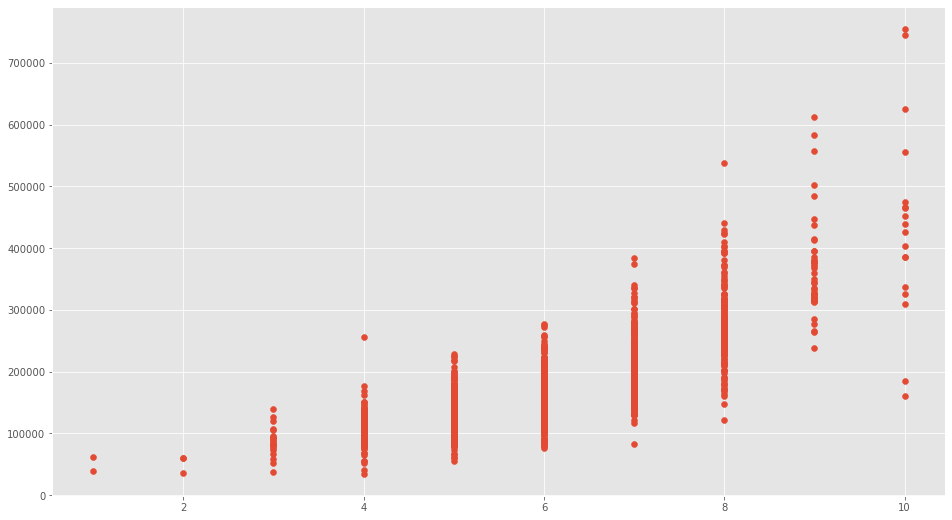

In [100]:
#Seleccion de datos
x = data["OverallQual"]
y = data["SalesPrice"]

plt.scatter(x,y)
plt.show()

In [101]:
## Division de datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,shuffle = True, random_state = 123)

# Visualizando el dataset Train
print(X_train)
print(y_train)

# Visualizando el dataset Test
print(X_test)
print(y_test)

318     7.0
580     6.0
961     6.0
78      4.0
5       5.0
       ... 
1041    6.0
1122    4.0
1346    7.0
1406    5.0
1389    6.0
Name: OverallQual, Length: 1168, dtype: float64
318     260000.0
580     181900.0
961     272000.0
78      136500.0
5       143000.0
          ...   
1041    173000.0
1122    112000.0
1346    262500.0
1406    133000.0
1389    131000.0
Name: SalesPrice, Length: 1168, dtype: float64
147     7.0
676     4.0
1304    7.0
1372    7.0
1427    5.0
       ... 
1012    6.0
1059    6.0
890     5.0
628     5.0
352     5.0
Name: OverallQual, Length: 292, dtype: float64
147     222500.0
676      87000.0
1304    130000.0
1372    274300.0
1427    140000.0
          ...   
1012    165000.0
1059    220000.0
890     122900.0
628     135000.0
352      95000.0
Name: SalesPrice, Length: 292, dtype: float64


In [102]:
# Creando DataSets
dataTest= pd.DataFrame() 
dataTrain= pd.DataFrame() 


dataTrain['x'] = X_train
dataTrain['y'] = y_train
#dataTrain

dataTest['x'] = X_test
dataTest['y'] = y_test
#dataTest

## Analizando DataTrain

In [103]:
dataTrain.describe()

,x,y
count,1168.000000,1168.000000
mean,6.093322,180717.069349
std,1.402296,79648.006799
min,1.000000,34900.000000
25%,5.000000,129900.000000
50%,6.000000,162000.000000
75%,7.000000,214000.000000
max,10.000000,755000.000000


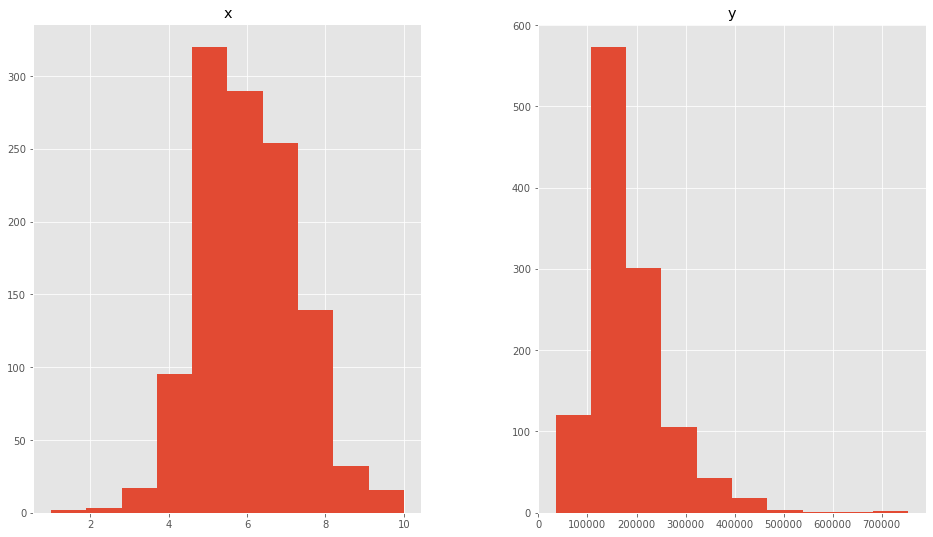

In [104]:
dataTrain.hist()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


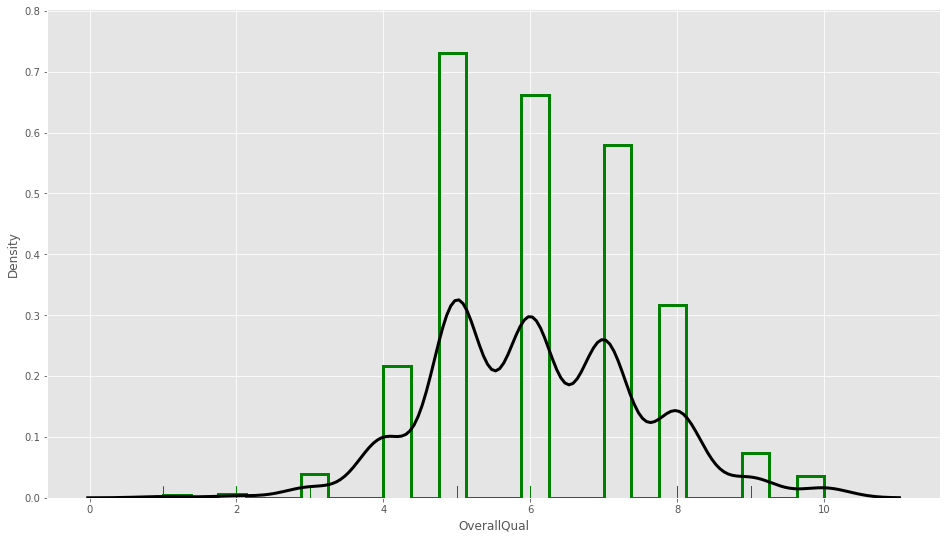

In [105]:
ax = sns.distplot(X_train, rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})

In [106]:
xcorr = dataTrain["x"]
ycorr = dataTrain["y"] 
## creando correlacion y covarianza
print(ycorr.corr(xcorr),ycorr.cov(xcorr))

0.7889930770922915 88122.68846694488


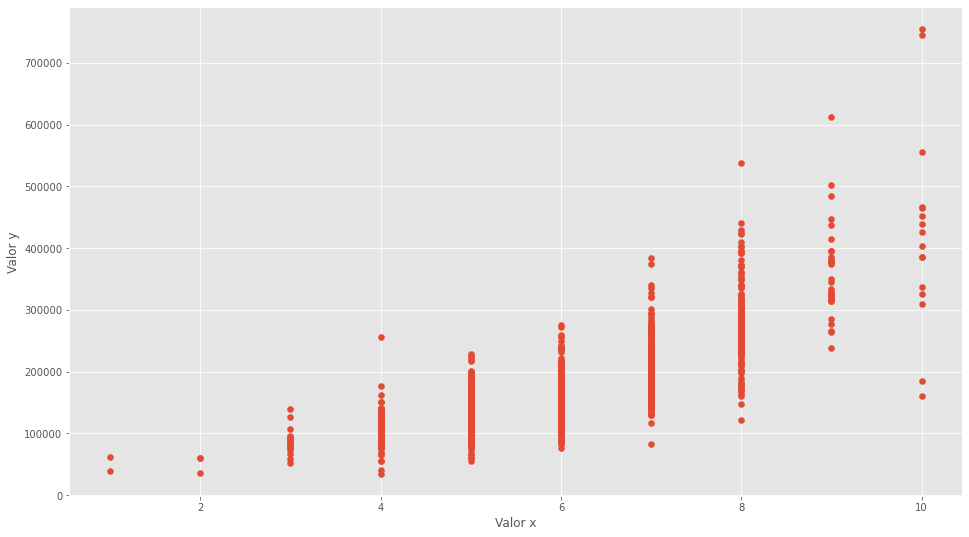

In [107]:
## Graficando Correlacion
x = dataTrain["x"]
y = dataTrain["y"]

plt.scatter(x,y)
plt.xlabel("Valor x")
plt.ylabel("Valor y")
plt.show()

## Validando Regresión

In [108]:
xTrain = dataTrain["x"].values.reshape(-1,1)
yTrain = dataTrain["y"].values.reshape(-1,1)
xTest = dataTest["x"].values.reshape(-1,1)
yTest = dataTest["y"].values.reshape(-1,1)

lm_1 = LinearRegression()
lm_1.fit(xTrain,yTrain)

LinearRegression()

In [109]:
lm_1.coef_

array([[44813.4594101]])

In [110]:
lm_1.intercept_

array([-92345.76508706])

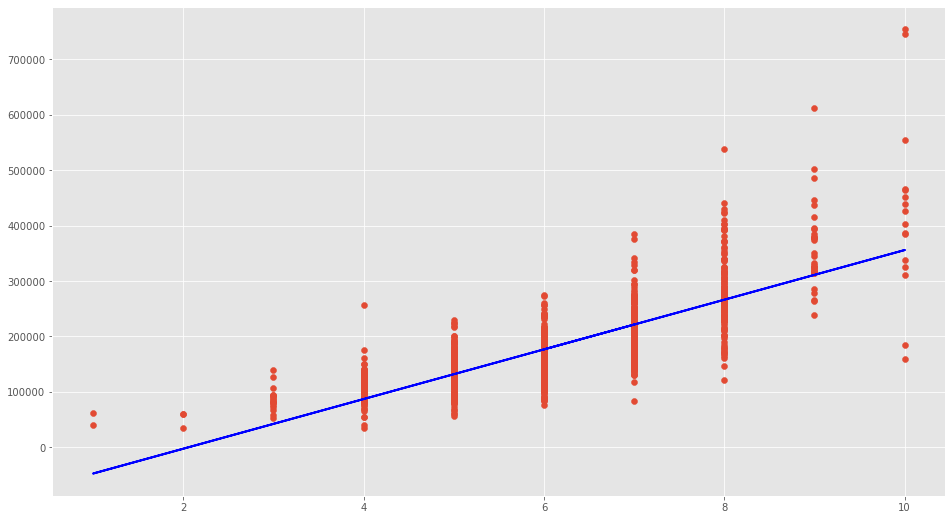

In [111]:
Y_predict_from_train=lm_1.predict(xTrain)

plt.scatter(dataTrain['x'],dataTrain['y'])
plt.plot(xTrain,Y_predict_from_train,color="blue",linewidth=2)
plt.show()

#### R cuadrado

In [112]:
rcuad =lm_1.score(xTrain,yTrain)
rcuad

0.6225100756995628

#### RMSE

In [113]:
Y_predicts_test=lm_1.predict(xTest)
rmse=math.sqrt(metrics.mean_squared_error(yTest,Y_predicts_test))
rmse

47304.390328551526

## Función de Regresión

In [114]:
errorArray=np.array([])
b0Array=np.array([])
b1Array=np.array([])

In [115]:
errorArray=np.array([])
X=xTrain
Y=yTrain
learning_rate=0.01
epoch=50000
b0=0
b1=0
n=len(X)

for i in range(epoch):
    yhat=b0+b1*X
    gradB1=1/n*np.sum((yhat-Y)*X)
    gradB0=1/n*np.sum((yhat-Y))
    
    error=1/2*n*np.sum(np.power(yhat-Y,2))
    errorArray=np.append(errorArray,error)
    
    b0Array =np.append(b0Array,b0)
    b1Array =np.append(b1Array,b1)
    
    b0=b0 - learning_rate*gradB0
    b1=b1 - learning_rate*gradB1
print("B0: {},B1: {}".format(b0,b1))

B0: -92345.76508492736,B1: 44813.459409767835


In [116]:
1/n*np.sum((yhat-Y))

1.049138269106513e-07

Text(0.5, 1.0, 'Analizando Error')

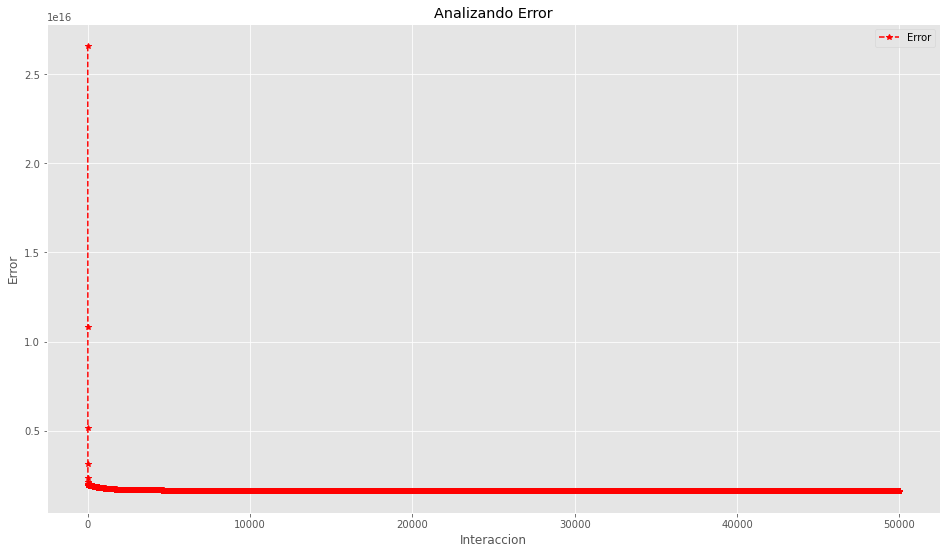

In [117]:
plt.plot(range(epoch),errorArray,color='r', marker = '*', linestyle = 'dashed', label='Error')
plt.xlabel('Interaccion')
plt.ylabel('Error')
plt.legend()
plt.title('Analizando Error')

### Funcion de Regresión (Iteraciones)

In [118]:
indice = ['{}'.format(i) for i in range(0,len(errorArray))]
Errores = pd.DataFrame(list(zip(indice,errorArray,b0Array,b1Array)), columns = ['Interaccion','Error','B0','B1'])
Errores

,Interaccion,Error,B0,B1
0,0,2.660034e+16,0.000000,0.000000
1,1,1.081359e+16,1807.170693,11892.145205
2,2,5.138543e+15,2871.642990,19025.139075
3,3,3.098335e+15,3490.834284,23304.746965
4,4,2.364742e+15,3843.063380,25873.584647
...,...,...,...,...
49995,49995,1.632070e+15,-92345.765085,44813.459410
49996,49996,1.632070e+15,-92345.765085,44813.459410
49997,49997,1.632070e+15,-92345.765085,44813.459410
49998,49998,1.632070e+15,-92345.765085,44813.459410


In [164]:
Minimo = pd.DataFrame() 
Medio = pd.DataFrame()
Maximo = pd.DataFrame() 


Errores["Interaccion"] = Errores["Interaccion"].astype(int)

#print (Errores.dtypes)
df = Errores['Interaccion'] == int(((int(min(Errores.Interaccion))+int(max(Errores.Interaccion)))/2)-23000)
Medio=Errores.loc[df]

aMedio=max(Medio.B0)
aMedio
bMedio=max(Medio.B1)
bMedio


39139.214332601165

In [165]:
Errores["Interaccion"] = Errores["Interaccion"].astype(int)

#print (Errores.dtypes)
df = Errores['Interaccion'] == (min(Errores.Interaccion)+1)
Minimo=Errores.loc[df]

aMinimo=max(Minimo.B0)
aMinimo
bMinimo=max(Minimo.B1)
bMinimo

11892.14520547945

In [166]:
Errores["Interaccion"] = Errores["Interaccion"].astype(int)

#print (Errores.dtypes)
df = Errores['Interaccion'] == (max(Errores.Interaccion))
Maximo=Errores.loc[df]

aMaximo=max(Maximo.B0)
aMaximo
bMaximo=max(Maximo.B1)
bMaximo

44813.45940976767

<function matplotlib.pyplot.show(close=None, block=None)>

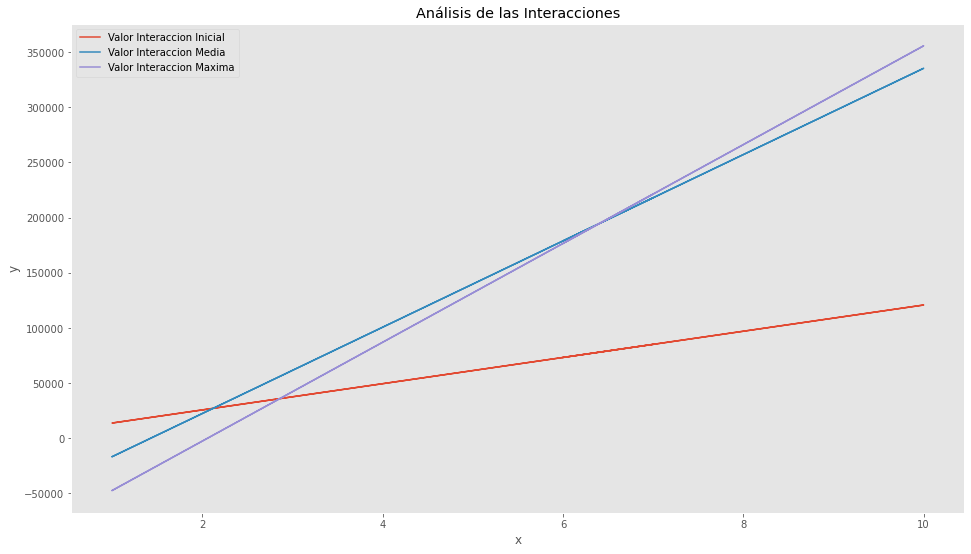

In [167]:
plt.plot(x, bMinimo*x + aMinimo, label='Valor Interaccion Inicial')
plt.plot(x, bMedio*x + aMedio, label='Valor Interaccion Media')
plt.plot(x, bMaximo*x + aMaximo, label='Valor Interaccion Maxima')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Análisis de las Interacciones')
plt.grid()
plt.legend()
plt.show

In [156]:
Optimo = pd.DataFrame() 

df = Errores['Error'] <= min(Errores.Error)
df = Errores['Interaccion'] == max(Errores.Interaccion)
Optimo=Errores.loc[df]
Optimo

,Interaccion,Error,B0,B1
49999,49999,1.632070e+15,-92345.765085,44813.45941


In [157]:
#a= Optimo['B0']
a=max(Optimo.B0)
a
#b= betaTrain['Beta1']
b=max(Optimo.B1)
b

44813.45940976767

### Graficando Regresión Óptima Train

<function matplotlib.pyplot.show(close=None, block=None)>

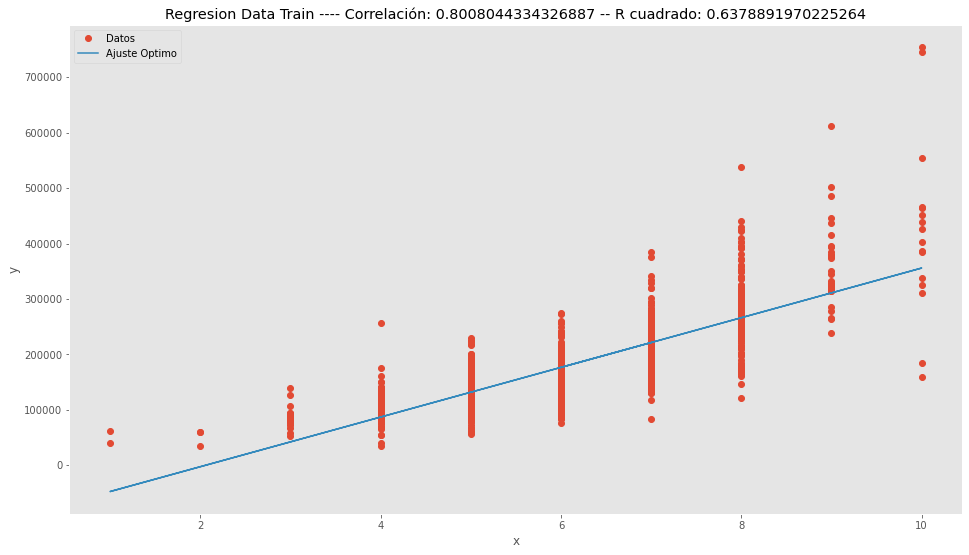

In [159]:
plt.plot(x,y,'o',label='Datos')
plt.plot(x, b*x + a, label='Ajuste Optimo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Data Train ---- Correlación: '+ str(ycorr.corr(xcorr)) + ' -- R cuadrado: '+ str(rcuad))
plt.grid()
plt.legend()
plt.show

#### Analizando DataTest

In [130]:
dataTest.describe()

,x,y
count,292.000000,292.000000
mean,6.123288,181737.702055
std,1.304975,78745.480984
min,3.000000,37900.000000
25%,5.000000,130000.000000
50%,6.000000,165500.000000
75%,7.000000,215000.000000
max,10.000000,625000.000000


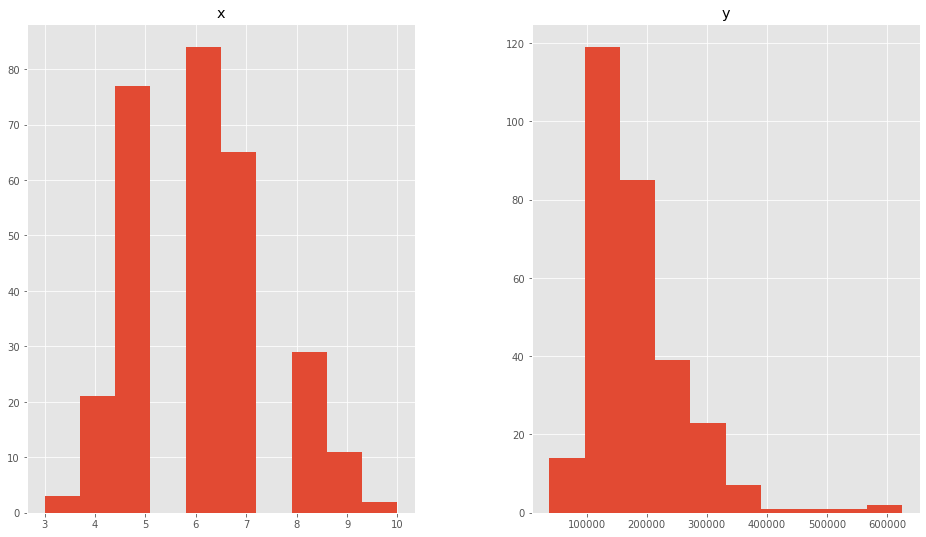

In [131]:
dataTest.hist()
plt.show()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


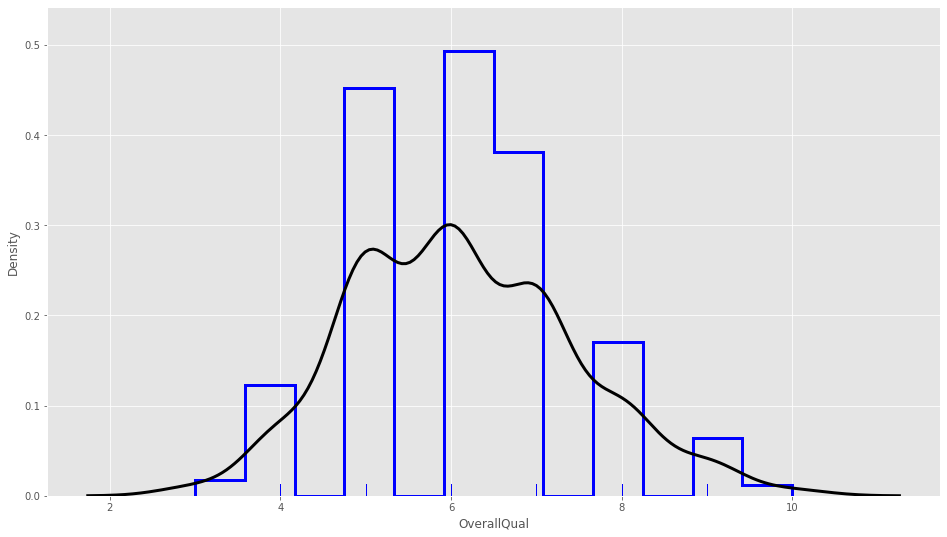

In [81]:
ax = sns.distplot(X_test, rug=True, rug_kws={"color": "b"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "b"})

In [132]:
xcorr = dataTest["x"]
ycorr = dataTest["y"] 
## creando correlacion y covarianza
print(ycorr.corr(xcorr),ycorr.cov(xcorr))

0.8008044334326887 82291.40112036905


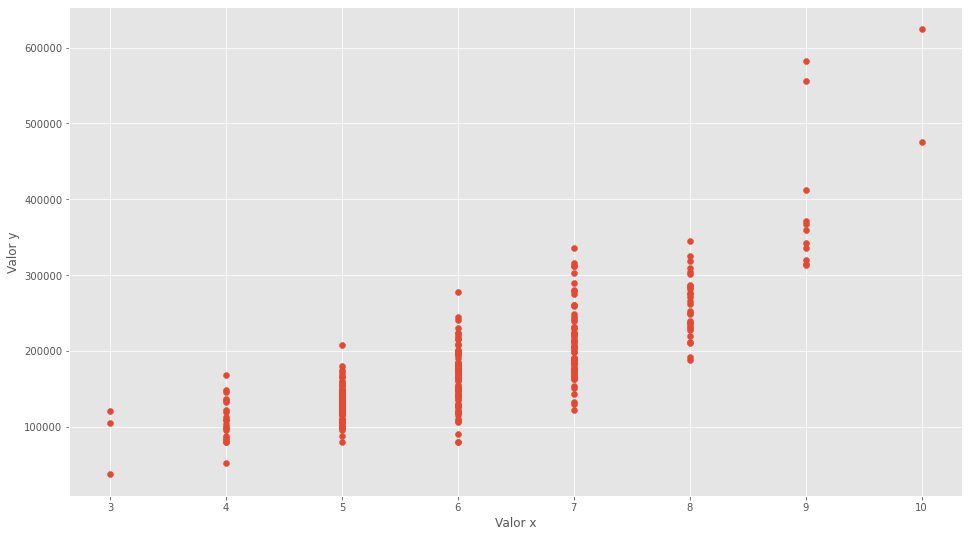

In [83]:
## Graficando Correlacion
x = dataTest["x"]
y = dataTest["y"]

plt.scatter(x,y)
plt.xlabel("Valor x")
plt.ylabel("Valor y")
plt.show()

### Analizando Modelo Test

In [133]:
rcuad =lm_1.score(xTest,yTest)
rcuad

0.6378891970225264

### Graficando Regresión DataTest

<function matplotlib.pyplot.show(close=None, block=None)>

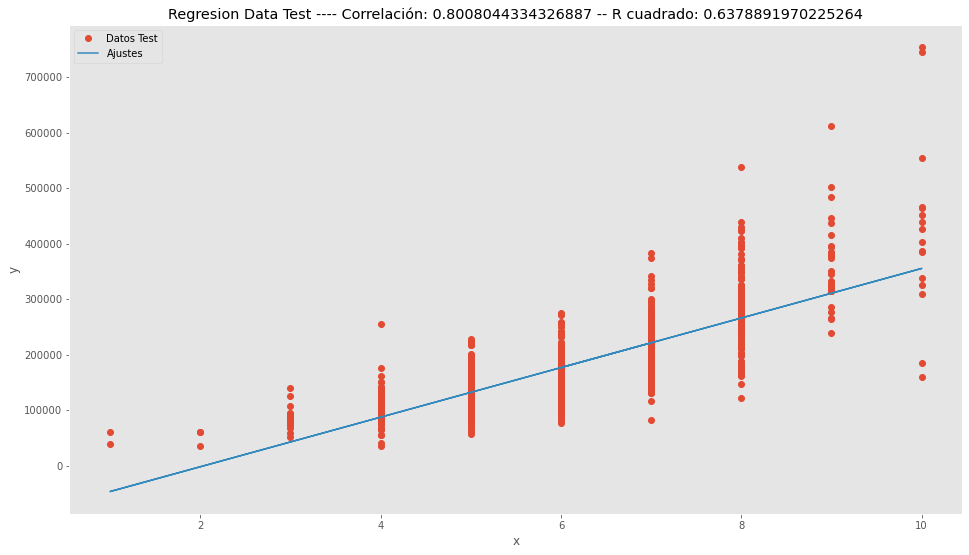

In [134]:
plt.plot(x,y,'o',label='Datos Test')
plt.plot(x, b*x + a, label='Ajustes')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Data Test ---- Correlación: '+ str(ycorr.corr(xcorr)) + ' -- R cuadrado: '+ str(rcuad))
plt.grid()
plt.legend()
plt.show

## *Prueba: Creacion de Regresión*

#### Regresion: DataTrain

In [86]:
#funcion para calcular nuevos valores
def Calcular(ciclo,betacero,betauno,alfa):
    datatemp = pd.DataFrame(DataPaso[DataPaso['Ciclo']==ciclo])    
    ResultadoError=datatemp['ErrorCuadrado'].sum()/(len(datatemp)*2)
    GradienteBeta1=datatemp['GradienteBeta1'].mean()
    GradienteBeta0=datatemp['Error'].mean()
    nuevoBeta0=betacero-alfa*datatemp['Error'].mean()
    nuevoBeta1=betauno-alfa*datatemp['GradienteBeta1'].mean()    
    return betacero,betauno,alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1


##### Llenado de dataframe (DataTrain)... con valores calculdos en la función

In [87]:
Interacciones = pd.DataFrame(columns=['NumInteraccion', 'Beta0','Beta1','Alfa', 'ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1'])

for i in range(15):
       if Interacciones.empty==True:
            alfa=0.15
            betacero=1
            betauno=1
            DataPaso=pd.DataFrame(columns=['x', 'y','Ciclo','EstimadoY', 'Error','ErrorCuadrado','GradienteBeta1'])
            DataPaso['x']=dataTrain['x']
            DataPaso['y']=dataTrain['y']
            DataPaso['Ciclo']=i
            DataPaso['EstimadoY']=dataTrain['x']*betauno+betacero
            DataPaso['Error']    =dataTrain['y']-DataPaso['EstimadoY']
            DataPaso['ErrorCuadrado']=DataPaso['Error']*DataPaso['Error']
            DataPaso['GradienteBeta1']=(DataPaso['EstimadoY']-dataTrain['y'])*dataTrain['x']
            Interacciones=Interacciones.append(pd.Series([i,
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[0],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[1],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[2],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[3],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[4],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[5],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[6],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[7]
                                                            ],index=['NumInteraccion','Beta0','Beta1','Alfa','ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1']),ignore_index=True)
            
            
           
       else:
            DataPaso=pd.DataFrame(columns=['x', 'y','Ciclo','EstimadoY', 'Error','ErrorCuadrado','GradienteBeta1'])
            betacero=Interacciones.loc[Interacciones.index[-1], 'nuevoBeta0']
            betauno=Interacciones.loc[Interacciones.index[-1], 'nuevoBeta1']
            DataPaso['x']=dataTrain['x']
            DataPaso['y']=dataTrain['y']
            DataPaso['Ciclo']=i
            DataPaso['EstimadoY']=dataTrain['x']*betauno+betacero
            DataPaso['Error']    =dataTrain['y']-DataPaso['EstimadoY']
            DataPaso['ErrorCuadrado']=DataPaso['Error']*DataPaso['Error']
            DataPaso['GradienteBeta1']=(DataPaso['EstimadoY']-dataTrain['y'])*dataTrain['x']
            Interacciones=Interacciones.append(pd.Series([i,
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[0],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[1],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[2],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[3],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[4],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[5],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[6],
                                                            pd.Series(Calcular(i,betacero,betauno,alfa))[7]
                                                            ],index=['NumInteraccion','Beta0','Beta1','Alfa','ResultadoError','GradienteBeta1','GradienteBeta0','nuevoBeta0','nuevoBeta1']),ignore_index=True)
            


In [88]:
Interacciones

,NumInteraccion,Beta0,Beta1,Alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1
0,0.0,1.000000e+00,1.000000e+00,0.15,1.949715e+10,-1.189169e+06,1.807100e+05,-2.710550e+04,1.783764e+05
1,1.0,-2.710550e+04,1.783764e+05,0.15,4.051138e+11,5.618949e+06,-8.790823e+05,1.047568e+05,-6.644659e+05
2,2.0,1.047568e+05,-6.644659e+05,0.15,9.002251e+12,-2.652708e+07,4.124765e+06,-5.139579e+05,3.314596e+06
3,3.0,-5.139579e+05,3.314596e+06,0.15,2.006726e+14,1.252576e+08,-1.950222e+07,2.411376e+06,-1.547405e+07
4,4.0,2.411376e+06,-1.547405e+07,0.15,4.473902e+15,-5.914279e+08,9.205771e+07,-1.139728e+07,7.324014e+07
5,5.0,-1.139728e+07,7.324014e+07,0.15,9.974420e+16,2.792564e+09,-4.346978e+08,5.380738e+07,-3.456444e+08
6,6.0,5.380738e+07,-3.456444e+08,0.15,2.223765e+18,-1.318571e+10,2.052496e+09,-2.540670e+08,1.632212e+09
7,7.0,-2.540670e+08,1.632212e+09,0.15,4.957813e+19,6.225931e+10,-9.691348e+09,1.199635e+09,-7.706683e+09
8,8.0,1.199635e+09,-7.706683e+09,0.15,1.105329e+21,-2.939713e+11,4.575985e+10,-5.664342e+09,3.638901e+10
9,9.0,-5.664342e+09,3.638901e+10,0.15,2.464295e+22,1.388051e+12,-2.160654e+11,2.674547e+10,-1.718187e+11


In [89]:
betaTrain= pd.DataFrame() 

df = Interacciones['ResultadoError'] <= min(Interacciones.ResultadoError)
betaTrain=Interacciones.loc[df]
betaTrain

,NumInteraccion,Beta0,Beta1,Alfa,ResultadoError,GradienteBeta1,GradienteBeta0,nuevoBeta0,nuevoBeta1
0,0.0,1.0,1.0,0.15,1.949715e+10,-1.189169e+06,180709.976027,-27105.496404,178376.400086


In [90]:
#a= betaTrain['Beta0']
a=max(betaTrain.Beta0)
a
#b= betaTrain['Beta1']
b=max(betaTrain.Beta1)
b

1.0

#### Graficando Regresión DataTrain

<function matplotlib.pyplot.show(close=None, block=None)>

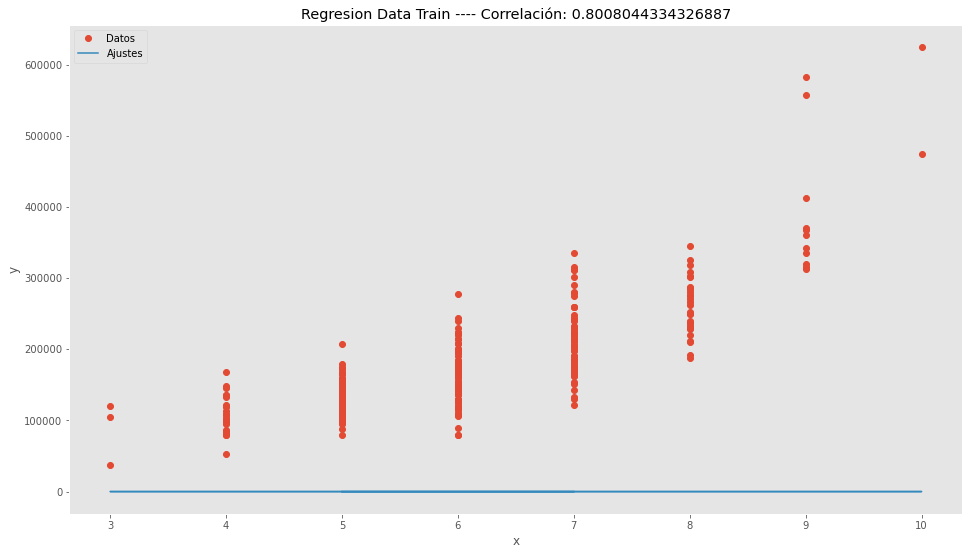

In [91]:
plt.plot(x,y,'o',label='Datos')
plt.plot(x, b*x + a, label='Ajustes')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresion Data Train ---- Correlación: '+ str(ycorr.corr(xcorr)))
plt.grid()
plt.legend()
plt.show

Text(0.5, 1.0, 'Analizando Error')

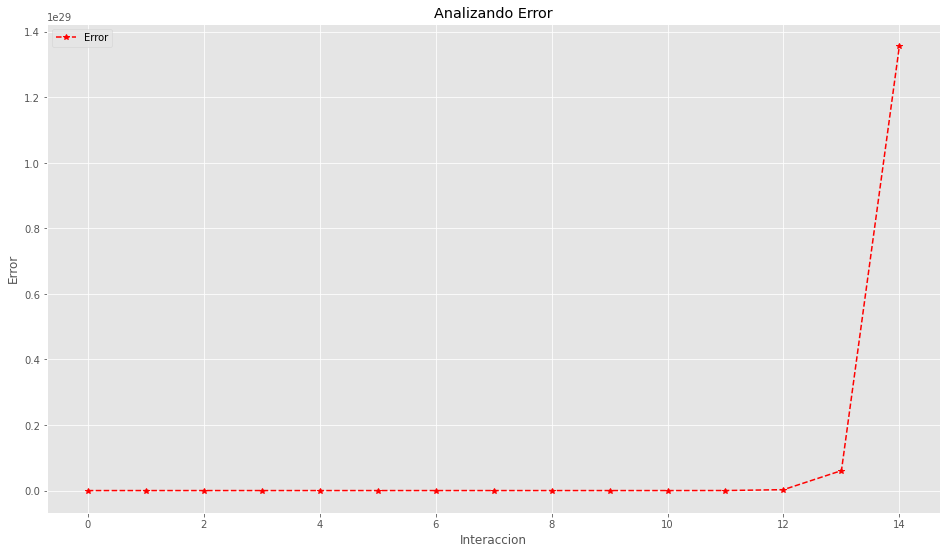

In [92]:
x1 = Interacciones["NumInteraccion"]
y1 = Interacciones["ResultadoError"]
plt.plot(x1, y1, color='r', marker = '*', linestyle = 'dashed', label='Error')
#poner etiqueta al eje x
plt.xlabel('Interaccion')
#poner etiqueta al eje y
plt.ylabel('Error')
#mostrar leyenda
plt.legend()
plt.title('Analizando Error')

In [93]:
xTest = dataTest["x"].values.reshape(-1,1)
yTest = dataTest["y"].values.reshape(-1,1)

lm_2 = LinearRegression()
lm_2.fit(xTest,yTest)

LinearRegression()

In [94]:
lm_2.coef_

array([[48322.54074525]])

In [95]:
lm_2.intercept_

array([-114155.11593322])